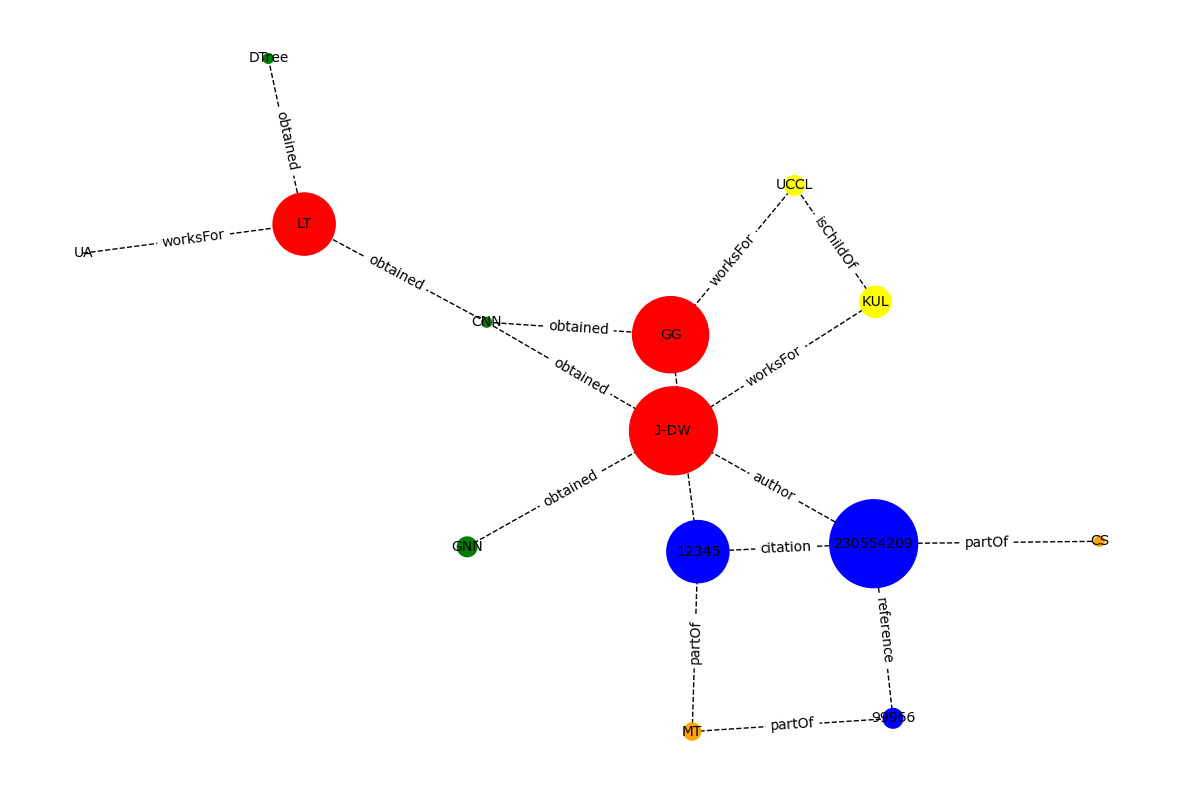

In [148]:
import matplotlib.pyplot as plt
import networkx as nx

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------

show_experience= True
show_domain= True
show_org_relation= True
show_reference= True
show_citation= True
show_worksfor= True 
show_author= True
show_paper= True
show_researcher= True

show_node_score_size=True
node_size_MP=10

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------

def search_org(G, orgId):    
    for nid, attrs in G.nodes.data():       
        if attrs.get('type') == 'organisation' and attrs.get('orgId') == orgId:
           return nid           

def get_node_colors(G) :    
    node_color_dict = {"organisation":"yellow","paper":"blue","researcher":"red","domain":"orange","experience":"green"}        
    return [node_color_dict[node[1]] for node in G.nodes(data="type")]

def get_node_size(G,node_size_MP, show_node_score_size) :   
    if show_node_score_size:
        return [node[1]*node_size_MP for node in G.nodes(data="score")]
    else:
        return [400 for node in G.nodes(data="score")]

def add_organisations(G, organisations,show_org_relation) :
    for org in organisations :        
        G.add_node(org['name'], type='organisation', orgId=org['orgId'],parentOrgId=org['parentOrgId'],country=org['country'],city=org['city'],score=org['score'])

    if show_org_relation:
        for org in organisations : 
            if org['parentOrgId'] != 0:           
                G.add_edge(org['name'], search_org(G,org['parentOrgId']), type='isChildOf')

def add_domains(G, domains) :
    for domain in domains :        
        G.add_node(domain['name'], type='domain', score=domain['score']) 

def add_papers(G, papers, show_domain, show_reference, show_citation) :
    for paper in papers :        
        G.add_node(paper['paperId'], type='paper', title=paper['title'], date=paper['date'] , publication=paper['publication'], score=paper['score'])
        
        if show_domain:
            for domain in paper['domains']:
                G.add_edge(paper['paperId'], domain, type='partOf')
                
    if show_citation or show_reference:
        for paper in papers :
            if show_citation:
                for citation in paper['citations']:
                    G.add_edge(paper['paperId'], citation, type='citation')

            if show_reference:
                for reference in paper['references']:
                    G.add_edge(paper['paperId'], reference, type='reference')

def add_experiences(G, experiences) :
    for experience in experiences :        
        G.add_node(experience['name'], type='experience', score=experience['score']) 
        
def add_researchers(G, researchers, show_experience, show_worksfor, show_author, show_paper) :
    for researcher in researchers :        
        G.add_node(researcher['name'], type='researcher', resId=researcher['resId'], position=researcher['position'], score=researcher['score'])

        if show_experience:
            for experience in researcher['experiences']:
                G.add_edge(researcher['name'], experience, type='obtained')

        if show_worksfor and researcher['org'] != 0:
            G.add_edge(researcher['name'], search_org(G,researcher['org']), type='worksFor')

        if show_paper and show_author:
            for paper in researcher['papers']:
                G.add_edge(researcher['name'], paper, type='author')

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------

G = nx.Graph()
plt.figure(3,figsize=(15,10))

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------

#Data source
organisations = [{'name':'UA','city':'Antwerpen','country':'Belgium','orgId':755,'score':0,'parentOrgId':0},
                 {'name':'KUL','city':'Leuven','country':'Belgium','orgId':844,'score':50,'parentOrgId':0},
                 {'name':'UCCL', 'city':'Leuven','country':'Belgium','orgId':965,'score':20,'parentOrgId':844}
                ]

domains = [{'name':'CS','score':5},
          {'name':'MT','score':15}       
         ]

papers = [{'title':'XYZ','date':'15-10-2005','publication':'article','paperId':230554209,'score':400,'domains':['CS'],'citations':[12345],'references':[99966]},
          {'title':'WXR','date':'15-10-2005','publication':'article','paperId':12345,'score':200,'domains':['MT'],'citations':[],'references':[]},
          {'title':'KFL', 'date':'15-10-2005','publication':'study','paperId':99966,'score':20,'domains':['MT'],'citations':[],'references':[]}
         ]

experiences = [{'name':'CNN','score':5},
               {'name':'GNN','score':20},
               {'name':'DTree','score':5}
              ]

researchers = [{'name':'J-DW','position':'prof','resId':963,'score':400,'experiences':['CNN','GNN'],'org':844,'papers':[230554209]},
          {'name':'LT','position':'student','resId':555,'score':200,'experiences':['DTree','CNN'],'org':755,'papers':[]},
          {'name':'GG','position':'Phd','resId':966,'score':300,'experiences':['CNN'],'org':965,'papers':[12345]}       
         ]

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------

#create graph data - nodes
if show_worksfor:
    add_organisations(G, organisations, show_org_relation)
if show_domain:
    add_domains(G, domains)
if show_paper:
    add_papers(G, papers, show_domain, show_reference, show_citation)
if show_experience:
    add_experiences(G, experiences)
if show_researcher:
    add_researchers(G, researchers, show_experience, show_worksfor, show_author, show_paper)

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------

pos = nx.nx_agraph.graphviz_layout(G)
ax = plt.gca()
ax.margins(0.02)
plt.axis("off")

# nodes
nx.draw_networkx_nodes(G, pos, node_size=get_node_size(G, node_size_MP, show_node_score_size), alpha=1, node_color=get_node_colors(G))

# node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="Verdana", font_color="black")

# edges
nx.draw_networkx_edges(G, pos, edge_color="black", style="dashed")

# edge type labels
edge_labels = nx.get_edge_attributes(G, "type")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_family="Verdana")

#Display Network graph
plt.show()